#  Matplotlib and Linear Regression

1. If the variable is categorical (type str) or quantative discrete (type integer)  and you need to plot the frequencies - use a bar plot or pie plot.
2. If the variable is quantative continuous and you need to plot frequancies - use histogram.
3. If the data is quantative continuous and you want to see its values relative to another variable - use line plot
3. To compare distributions of ordered variables use boxplot.
4. To check if two quantative variables are correlated - use scatter plot.

In [1]:
#run cell
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Read 'Bakery sales.csv' into data frame, look at first few rows and get info about the columns

In [4]:
#is there an index_col ? 
df = pd.read_csv('Bakery sales.csv')
print(df.head())
print(df.info())

   Unnamed: 0        date   time  ticket_number               article  \
0           0  2021-01-02  08:38       150040.0              BAGUETTE   
1           1  2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4  2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5  2021-01-02  09:14       150041.0                  PAIN   
4           8  2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-

####  Try again using parse_date to make pd.read_csv read the date  as datetime 

In [5]:
df = pd.read_csv('Bakery sales.csv',parse_dates=['date'])
print(df.head())
print(df.info())

   Unnamed: 0       date   time  ticket_number               article  \
0           0 2021-01-02  08:38       150040.0              BAGUETTE   
1           1 2021-01-02  08:38       150040.0      PAIN AU CHOCOLAT   
2           4 2021-01-02  09:14       150041.0      PAIN AU CHOCOLAT   
3           5 2021-01-02  09:14       150041.0                  PAIN   
4           8 2021-01-02  09:25       150042.0  TRADITIONAL BAGUETTE   

   Quantity unit_price  
0       1.0     0,90 €  
1       3.0     1,20 €  
2       2.0     1,20 €  
3       1.0     1,15 €  
4       5.0     1,20 €  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Unnamed: 0     234005 non-null  int64         
 1   date           234005 non-null  datetime64[ns]
 2   time           234005 non-null  object        
 3   ticket_number  234005 non-null  float64   

#### Drop unnecessary unnamed column

In [6]:
df = df.drop('Unnamed: 0',axis=1)
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"


#### Make unit_price into a float , discard euro symbol

In [7]:
df.unit_price = df.unit_price.str.replace(',','.').str.replace('€','').astype('float')
df.head()

,date,time,ticket_number,article,Quantity,unit_price
0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,0.90
1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,1.20
2,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,1.20
3,2021-01-02,09:14,150041.0,PAIN,1.0,1.15
4,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,1.20


#### What are the minimum and maximum dates?

In [8]:
print(df.date.min(), df.date.max())

2021-01-02 00:00:00 2022-09-30 00:00:00


#### Article is a categorical variable. Make a series of the total numbers of each type of bread bought on 2021-01-02.

In [9]:
df_day1=df.loc[df.date == pd.Timestamp(2022,1,2)] 
article = df_day1.groupby(df_day1.article).Quantity.sum()
article.head()

article
BAGUETTE        55.0
BANETTE         67.0
BANETTINE        8.0
BOISSON 33CL     3.0
BOULE 200G       6.0
Name: Quantity, dtype: float64

#### Now make a bar plot for article

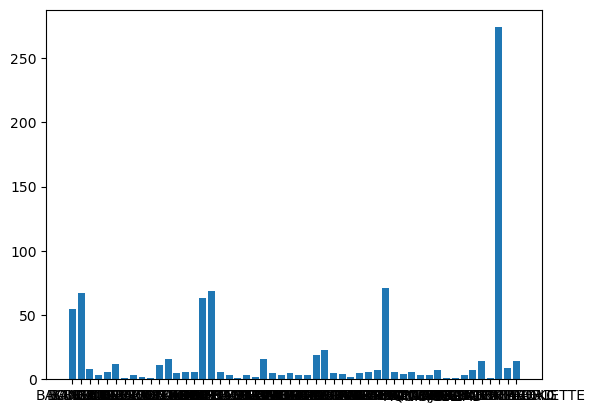

In [10]:
plt.bar(article.index,article)
plt.show()

#### Increase figure size and rotate xticks

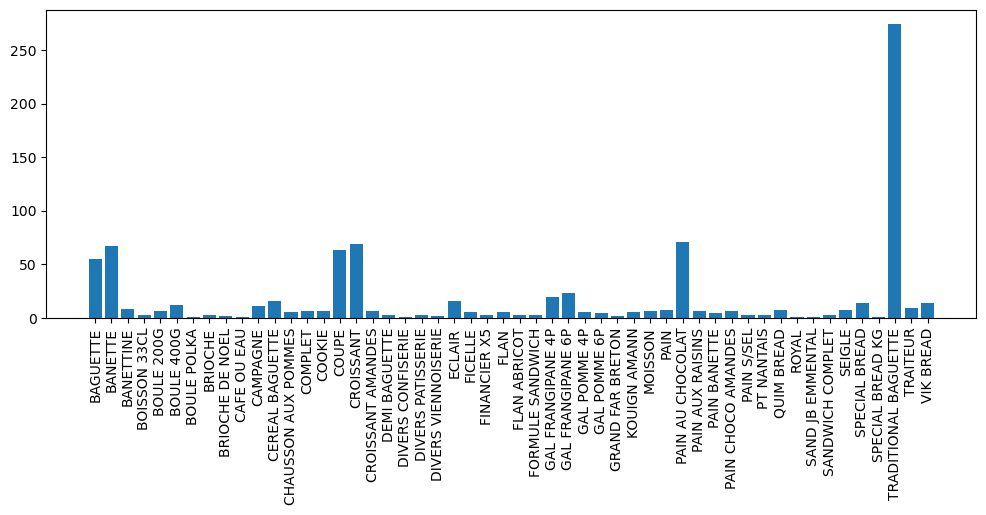

In [11]:
# run cell
plt.rcParams['figure.figsize']=[12,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.show()

#### We can add axis labels and a title

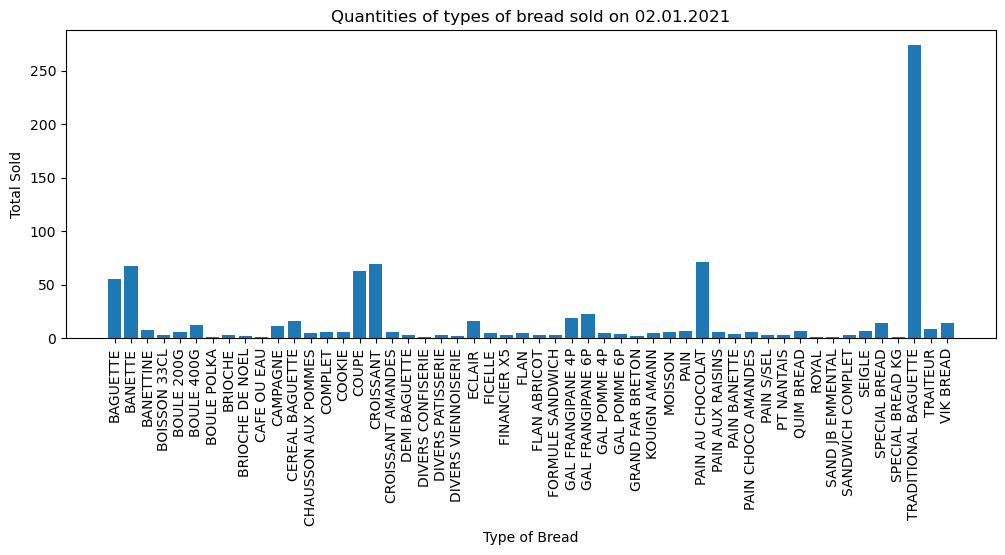

In [12]:
plt.rcParams['figure.figsize']=[12,4]
plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.xlabel('Type of Bread')
plt.ylabel('Total Sold')
plt.title('Quantities of types of bread sold on 02.01.2021')
plt.show()

#### Make pie chart of 8 best selling articles

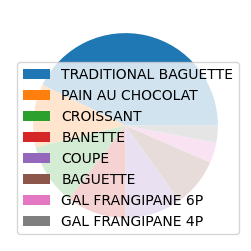

In [13]:
#CODE HERE
plt.rcParams['figure.figsize']=[6,3]
plt.pie(article.nlargest(8)) 
plt.legend(article.nlargest(8).index,loc='lower left')
plt.show()

#### Move legend so it doesn't cover the chart

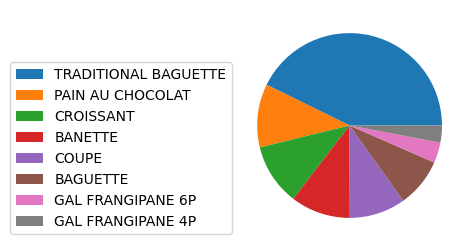

In [31]:
plt.rcParams['figure.figsize']=[6,3]
plt.pie(article.nlargest(8)) 
plt.legend(article.nlargest(8).index,loc='lower left')
plt.legend(article.nlargest(8).index,loc='lower left',bbox_to_anchor = (-1,0,0,0))
plt.show()

#### Make a series of the total income by month

In [37]:
# first add a column 'total' containing the total sale by multiplying the quantity bought by the unit price 
# CODE HERE
df['total'] = df['Quantity']*df['unit_price']
income_by_month=df.groupby(df['date'].dt.to_period('M'))['total'].sum()
income_by_month.head()

date
2021-01    15258.67
2021-02    16827.15
2021-03    20087.60
2021-04    24649.75
2021-05    29617.25
Freq: M, Name: total, dtype: float64

#### Make a line plot of income_by_month

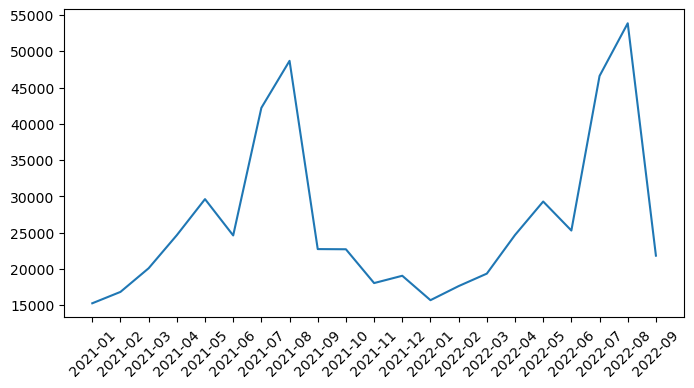

In [43]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot((income_by_month.index).astype('str'),income_by_month)
plt.xticks(rotation=45)
plt.show()

#### When are the highest sales? When are the lowest?

# summer:highest , winter: lowest

#### Make a series total_order by grouping by ticket_number and calculating the total sale from each ticket

In [44]:
#CODE HERE
total_order = df.groupby(['ticket_number'])['total'].sum()
total_order.head()

ticket_number
150040.0    4.50
150041.0    3.55
150042.0    6.00
150043.0    5.10
150044.0    1.05
Name: total, dtype: float64

#### Plot a histogram of total_order

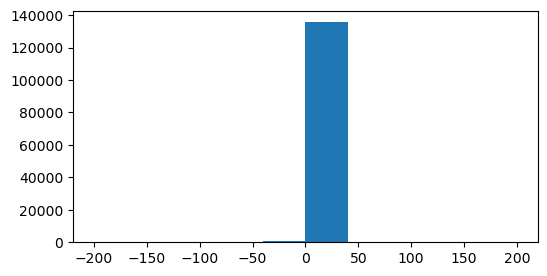

In [46]:
plt.hist(total_order)
plt.show()

In [47]:
total_order.describe()

count    136451.000000
mean          4.094077
std           4.536965
min        -200.000000
25%           1.300000
50%           2.500000
75%           5.100000
max         200.000000
Name: total, dtype: float64

#### Plot histogram for total order by order between 0 and 10

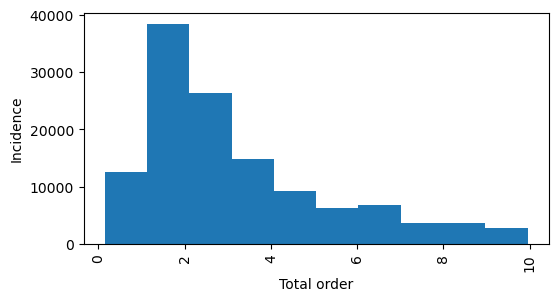

In [52]:
filt = total_order.apply(lambda x: x>0 and x<10)
total_order_filtered =total_order[filt]
plt.hist(total_order_filtered)
#plt.bar(article.index,article)
plt.xticks(rotation=90)
plt.xlabel('Total order')
plt.ylabel('Incidence')

plt.show()

#### Now we will learn what a boxplot is!

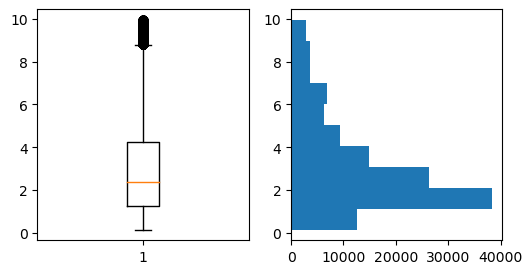

In [53]:
fig,(ax1,ax2)=plt.subplots(1,2)
ax1.boxplot(total_order_filtered)
ax2.hist(total_order_filtered,orientation='horizontal')
plt.show()

#### Make a boxplot showing the distribution of total_order

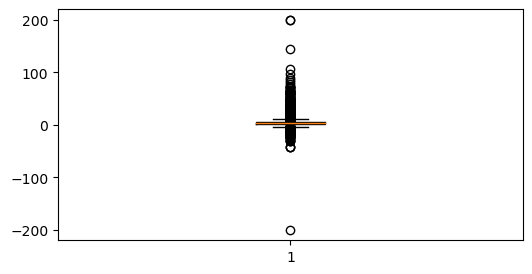

In [54]:
#CODE HERE
plt.boxplot(total_order)
plt.show()

#### There are too many outliers. Use only prices whose distance from the upper and lower quartiles is less than 1.5 times the IQR.

In [56]:
q1=total_order.quantile(0.25)
q3=total_order.quantile(0.75)
print(q1 , q3)

1.2999999999999998 5.1


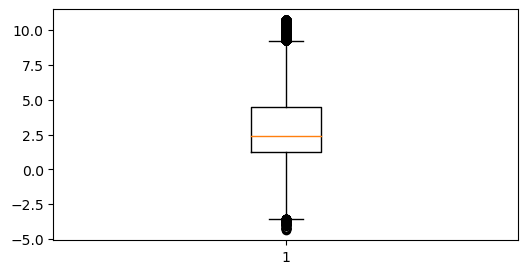

In [57]:
# Tukey's method for removing outliers

IQR = q3-q1
filt2 =total_order.apply(lambda x: x > q1-1.5*IQR  and x < q3 +1.5*IQR)
filtered_total=total_order[filt2]

plt.boxplot(filtered_total)
plt.show()

#### Calculate the mean, median, mode and standard deviation of total order.

In [58]:
#CODE HERE
from scipy import stats
print("mean:",total_order.mean())
print('median: ',total_order.median())
print(stats.mode(total_order))
print('standard deviation: ',total_order.std())

mean: 4.094076628240578
median:  2.5
ModeResult(mode=array([1.2]), count=array([12649]))
standard deviation:  4.53696531779332


C:\Users\yehus\AppData\Local\Temp\ipykernel_18492\891615301.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print(stats.mode(total_order))


#### Make a scatter plot showing the relationship between unit_price and total. Are the variables linearly correlated? Positive or negative correlation?

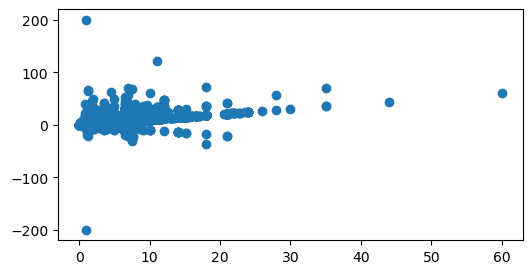

In [59]:
#CODE HERE
plt.scatter(df['unit_price'] , df['total'])

#### Calculate the correlation coefficient for unit_price and total

In [61]:
#CODE HERE
df[['unit_price', 'total', 'Quantity']].corr()

,unit_price,total,Quantity
unit_price,1.000000,0.690531,-0.076422
total,0.690531,1.000000,0.556604
Quantity,-0.076422,0.556604,1.000000


#### Colour the graph according to values of Quantity and add gridlines

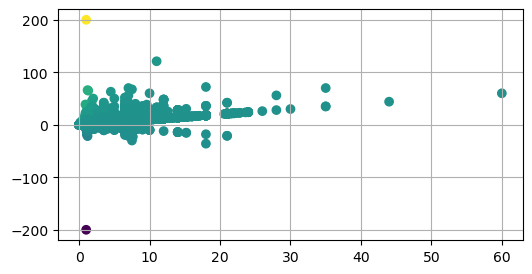

In [62]:
plt.scatter(df['unit_price'],df['total'],c=df['Quantity'])
plt.grid(True)
plt.show()

#### Add regression line  to scatter plot and calculate mse,rmse, R^2

In [ ]:
#import LinearRegression and instantiate class
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
lreg = LinearRegression()

#fit model and retrieve coefficient and intercept
#CODE HERE

#plot  regression line
#CODE HERE

#print mse
mse = mean_squared_error(y,lreg.predict(X))
r2 = r2_score(y,lreg.predict(X))
print('MSE = ' + str(mse))
print('rmse = '+ str(mse**0.5))
print('R^2 = '+str(r2))


#### Make residuals plot

In [ ]:
residuals = #CODE HERE
plt.plot(residuals)
plt.show()

#### Calculate mean and standard devaition of residuals

In [ ]:
res_mean = residuals.mean()
res_sd = residuals.std()
print(res_mean,res_sd)

#### Remove outliers - residuals that are further than 2 standard devaitions from the mean. (Removes about 5% of data if noramlly distributed)

In [ ]:
filt = residuals.apply(lambda x: #CODE HERE)
res_filtered = residuals[filt]


#### What is rmse now?

In [ ]:
#CODE HERE